In [3]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)

## Problem 1

$$f_1(x, y) = x^2 + 4y − 4$$
$$f_2(x, y) = 2y^2 − x^2$$

In [9]:
def y1(x):
    return -0.25 * x * x + 1

def y2(x):
    return np.sqrt(0.5 * x * x)

def y3(x):
    return -y2(x)

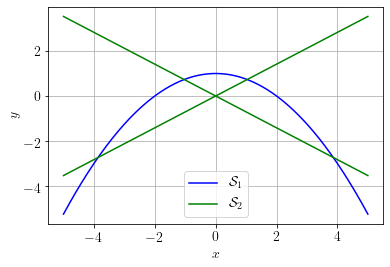

In [10]:
x = np.linspace(-5, 5, 200)

plt.plot(x, y1(x), 'b-', label="$\mathcal{S}_1$")
plt.plot(x, y2(x), 'g-', label="$\mathcal{S}_2$")
plt.plot(x, y3(x), 'g-')

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.legend()
plt.grid()
# plt.savefig('fig2_1.pdf', dpi=100)

In [11]:
def J(x, y):
    return np.array([[2 * x , 4    ],
                     [-2 * x, 4 * y]])

def f(x, y):
    return np.array([[x * x + 4 * y - 4],
                     [2 * y * y - x * x]])

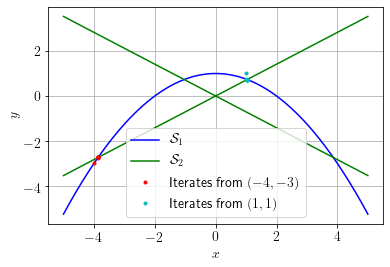

In [12]:
xka = -4
yka = -3
xa = [xka]
ya = [yka]

xkb = 1
ykb = 1
xb = [xkb]
yb = [ykb]

for i in range(1, 6):
    a = np.array([[xka], [yka]]) - (lin.inv(J(xka, yka)) @ f(xka, yka))
    b = np.array([[xkb], [ykb]]) - (lin.inv(J(xkb, ykb)) @ f(xkb, ykb))
    xka1 = a[0,0]
    yka1 = a[1,0]
    xkb1 = b[0,0]
    ykb1 = b[1,0]
    xa.append(xka1)
    ya.append(yka1)
    xb.append(xkb1)
    yb.append(ykb1)
    xka = xka1
    yka = yka1
    xkb = xkb1
    ykb = ykb1
    
xm = np.linspace(-5, 5, 200)

plt.plot(xm, y1(xm), 'b-', label="$\mathcal{S}_1$")
plt.plot(xm, y2(xm), 'g-', label="$\mathcal{S}_2$")
plt.plot(xm, y3(xm), 'g-')

plt.plot(xa, ya, 'r.', label="Iterates from $(-4, -3)$")
plt.plot(xb, yb, 'c.', label="Iterates from $(1, 1)$")

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.legend()
plt.grid()
plt.savefig('fig2_2.pdf', dpi=100)

## Problem 2

In [4]:
def lu(A):
    n = len(A)
    U = np.zeros((n, n))
    L = np.eye(n)
    for i in range(n):
        for j in range(n):
            if j >= i:
                s = 0
                for k in range(i):
                    s += L[i, k] * U[k, j]
                U[i, j] = A[i, j] - s
            else:
                if U[j, j] <= 1e-8:
                    raise Exception("Small number in U")
                s = 0
                for k in range(j):
                    s += L[i, k] * U[k, j]
                L[i, j] = (A[i, j] - s) / U[j, j]
    return L, U

In [6]:
A = np.matrix("[6, 2, 1, -1; 2, 4, 1, 0; 1, 1, 4, -1; -1, 0, -1, 3]")

L, U = lu(A)

# L, U, L @ U
print(L)
print(U)

[[ 1.          0.          0.          0.        ]
 [ 0.33333333  1.          0.          0.        ]
 [ 0.16666667  0.2         1.          0.        ]
 [-0.16666667  0.1        -0.24324324  1.        ]]
[[ 6.          2.          1.         -1.        ]
 [ 0.          3.33333333  0.66666667  0.33333333]
 [ 0.          0.          3.7        -0.9       ]
 [ 0.          0.          0.          2.58108108]]


## Problem 5

$$x_k = \frac{\displaystyle b_k - \sum_{i=1}^{k-1} l_{ki}x_i}{l_{kk}}$$

In [14]:
def forward(L, b):
    if len(L.shape) != 2:
        raise Exception("Not a matrix")
    h = L.shape[0]
    w = L.shape[1]
    if h != w or w != len(b):
        raise Exception("Size not compatible")
    n = w
    x = np.zeros(n)
    for k in range(n):
        a = 0
        for i in range(k):
            a += L[k, i] * x[i]
        a = b[k] - a
        x[k] = a / L[k, k]
    return x
        

In [15]:
L = np.array([[2,  0, 0,  0],
              [4, -1, 0,  0],
              [3,  1, 1,  0],
              [1,  2, 6, -1]])
b = np.array([-1, -3, -2, 4])

x = forward(L, b)

lin.solve_triangular(L, b, lower=True), x

(array([ -0.5,   1. ,  -1.5, -11.5]), array([ -0.5,   1. ,  -1.5, -11.5]))

In [59]:
n = 10000
A = np.tril((np.random.rand(n, n) * 200) + 100)
b = ((np.random.rand(n) * 200) + 100)

# x_builtin = lin.solve(A, b)
# A, b

In [60]:
%%time
x = forward(A, b)

/Users/zhangcirong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/zhangcirong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


CPU times: user 23.2 s, sys: 237 ms, total: 23.5 s
Wall time: 24.1 s


In [61]:
%%time
x_builtin = lin.solve(A, b, lower=True)

CPU times: user 57.7 s, sys: 1.92 s, total: 59.6 s
Wall time: 22.2 s


/Users/zhangcirong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.560663e-22
  """Entry point for launching an IPython kernel.


In [69]:
import gc
A = None
b = None
x = None
x_builtin = None
gc.collect()

20

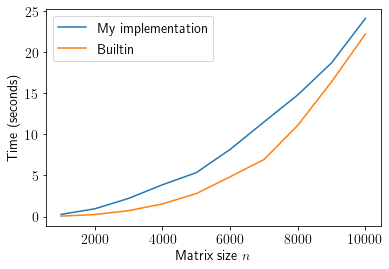

In [65]:
t_me =      [0.258,  0.946, 2.210, 3.870, 5.340, 8.17, 11.5, 14.8, 18.7, 24.1]
t_builtin = [0.0525, 0.245, 0.720, 1.540, 2.790, 4.84, 6.93, 11.1, 16.4, 22.2]
x = [(i + 1) * 1000 for i in range(10)]

plt.plot(x, t_me, label='My implementation')
plt.plot(x, t_builtin, label="Builtin")

plt.xlabel('Matrix size $n$')
plt.ylabel('Time (seconds)')
plt.legend()

plt.savefig('fig2_3.pdf', dpi=100)